In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Hasil prediksi.csv')
df

,SK_ID_CURR,TARGET
0,100001,0.365902
1,100005,0.139012
2,100013,0.036007
3,100028,0.027090
4,100038,0.769622
...,...,...
48739,456221,0.165300
48740,456222,0.469961
48741,456223,0.029948
48742,456224,0.110914


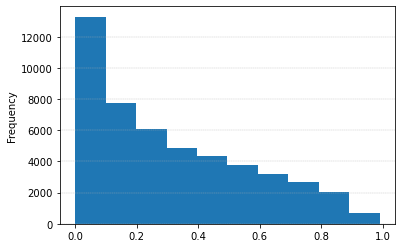

In [3]:
df['TARGET'].plot(kind='hist')
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.35)

In [4]:
df_test= pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
decimals = 2    
list_target = df['TARGET'].apply(lambda x: round(x, decimals))
list_target

0        0.37
1        0.14
2        0.04
3        0.03
4        0.77
         ... 
48739    0.17
48740    0.47
48741    0.03
48742    0.11
48743    0.78
Name: TARGET, Length: 48744, dtype: float64

In [6]:
list_age= round(abs(df_test['DAYS_BIRTH']/365),0)
list_age

0        53.0
1        49.0
2        55.0
3        38.0
4        36.0
         ... 
48739    55.0
48740    31.0
48741    44.0
48742    38.0
48743    38.0
Name: DAYS_BIRTH, Length: 48744, dtype: float64

In [7]:
list_income= df_test['AMT_INCOME_TOTAL']
list_income

0        135000.0
1         99000.0
2        202500.0
3        315000.0
4        180000.0
           ...   
48739    121500.0
48740    157500.0
48741    202500.0
48742    225000.0
48743    135000.0
Name: AMT_INCOME_TOTAL, Length: 48744, dtype: float64

In [8]:
age = list_age
target = list_target
income= list_income

# dictionary of lists 
dict = {'Age': age, 'Target': target, 'Income': income} 
    
df_new_list= pd.DataFrame(dict)
df_new_list

,Age,Target,Income
0,53.0,0.37,135000.0
1,49.0,0.14,99000.0
2,55.0,0.04,202500.0
3,38.0,0.03,315000.0
4,36.0,0.77,180000.0
...,...,...,...
48739,55.0,0.17,121500.0
48740,31.0,0.47,157500.0
48741,44.0,0.03,202500.0
48742,38.0,0.11,225000.0


In [11]:
grouped_= df_new_list.groupby(['Age','Target','Income']).agg('count')
grouped_.reset_index(inplace=True)
grouped_.columns=['Age','Target','Income']
grouped_

,Age,Target,Income
0,20.0,0.17,157500.0
1,20.0,0.91,112500.0
2,21.0,0.14,139500.0
3,21.0,0.15,203530.5
4,21.0,0.28,148500.0
...,...,...,...
33906,69.0,0.53,103050.0
33907,69.0,0.59,112500.0
33908,69.0,0.63,81000.0
33909,69.0,0.67,189000.0
